# GRIP : The Sparks Foundation

# Task 1 - Prediction using Supervised ML
### Predict the percentage of a student based on the number of study hours

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
#reading data
db = pd.read_csv('http://bit.ly/w-data')
db.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checcking null value in dataset
db.isnull == True

False

No null value in dataset so, we can visualize the data

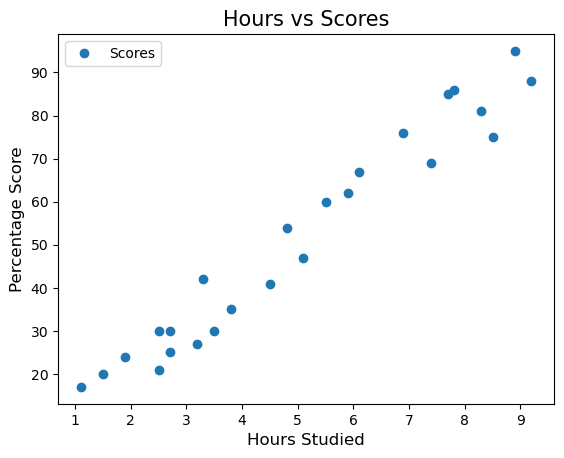

In [5]:
#visualizing the data
db.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Scores', size = 15)
plt.xlabel('Hours Studied', size = 12)
plt.ylabel('Percentage Score', size = 12)
plt.show()

### From the above graph, we can see that there is a correlation between the 'Percentage Score' and 'Hours Studied'

In [6]:
#dividing the data into 'attributes' and 'labels'
x = db.iloc[:, :-1].values
y = db.iloc[:, 1].values

#spliting the data into training and test sets.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [7]:
#training the model
regression = LinearRegression()
regression.fit(x_train, y_train)

print("model trained...")

model trained...


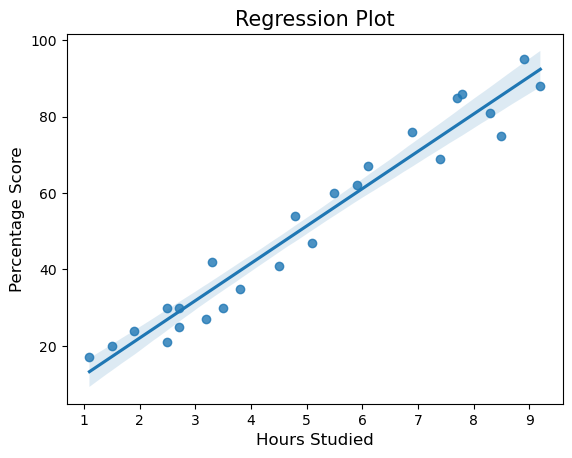

In [8]:
sns.regplot(x = db['Hours'], y = db['Scores'])
plt.title('Regression Plot', size = 15)
plt.xlabel('Hours Studied', size = 12)
plt.ylabel('Percentage Score', size = 12)
plt.show()

### From the above graph, it is confirmed that the variables are positively correlated

In [9]:
#now predicting the percentage score
y_pred = regression.predict(x_test)

#comparing the predicted score with the actual score
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


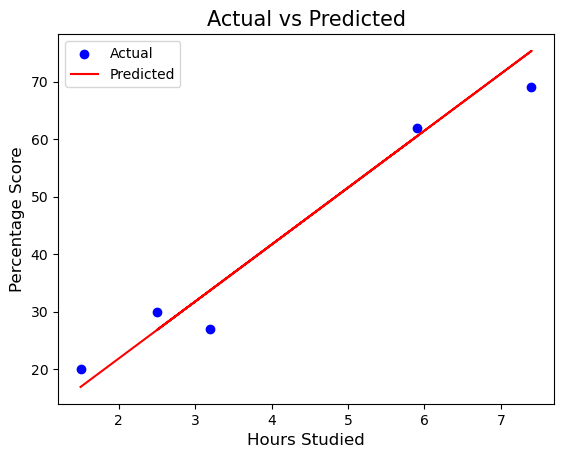

In [13]:
#visualizing predicted score vs actual score
plt.scatter(x = x_test, y = y_test, color = 'blue', label = 'Actual')
plt.plot(x_test, y_pred,  color = 'red', label = 'Predicted')
plt.legend()
plt.title('Actual vs Predicted', size = 15)
plt.ylabel('Percentage Score', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

In [14]:
#evaluating the model, calculating the accuracy of the model
print ('Mean absolute error: ', mean_absolute_error(y_test, y_pred))

Mean absolute error:  4.183859899002975


### What will be the predicted score if a student studies for 9.25 hrs/day?

In [17]:
hours = [9.25]
ans = regression.predict([hours])
print("Score = {}".format(round(ans[0],3)))

Score = 93.692


#### According to the regression model if a student studies for 9.25 hours a day he/she likely to score 93.692 marks